In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [74]:
#Create a function for each defects where each function receive an bottle image with one or more defects. The image will be a numpy array.
"""
Defect list: 
CONTENT_HIGH ok,
CONTENT_LOW ok,
COVER_NONE ok,
LABEL_WHITE  ok,
BOTTLE_NONE ok ,
LABEL_NONE ok,

BOTTLE_SMASHED,
LABEL_MISPLACED,
"""

'\nDefect list: \nCONTENT_HIGH ok,\nCONTENT_LOW ok,\n\nCOVER_NONE (tampa) to be implemented,\nBOTTLE_SMASHED,\nLABEL_WHITE ok,\nLABEL_MISPLACED,\nLABEL_NONE ok,\nBOTTLE_NONE .\n'

In [75]:
def content_high():
    return

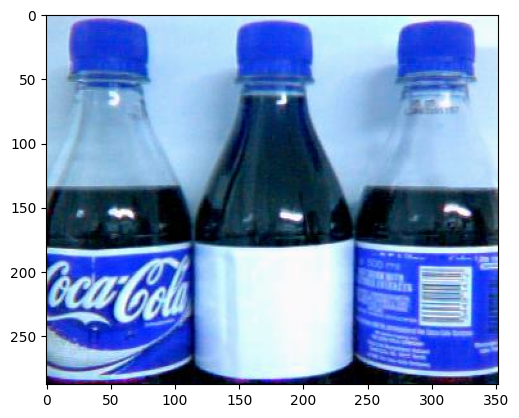

In [76]:
img = cv2.imread("train/train_67.jpg")

plt.imshow(img, cmap='gray')

In [77]:
def split_image(img, y_start, plot=False):

    image = img
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    height, width = image.shape

    # Calculate the split points for both width and height
    split_point1_width = width // 3
    split_point2_width = 2 * width // 3
    split_point1_height = height // 2

   

    # Split the image into three parts
    part1 = image[y_start:split_point1_height, :split_point1_width]
    part2 = image[y_start:split_point1_height, split_point1_width:split_point2_width]
    part3 = image[y_start:split_point1_height, split_point2_width:]

    if plot:
        
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(part1, cv2.COLOR_BGR2RGB))
        plt.title('Part 1')
    
        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(part2, cv2.COLOR_BGR2RGB))
        plt.title('Part 2')
    
        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(part3, cv2.COLOR_BGR2RGB))
        plt.title('Part 3')
        
        plt.show()

    return part1, part2, part3


In [78]:
def segmentation(img, plot=False):
    _, image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    if plot:
        plt.imshow(image, cmap='gray')
        plt.show()
        
    return image

In [150]:
def mean_of_roi(img, row_start, row_end, col_start, col_end, target, is_high, print_result=False):
    roi = img[row_start:row_end, col_start:col_end]
    mean = np.mean(roi)
    
    if print_result:
        print("Mean value based on ROI: ",mean)
 
    if is_high:
        if mean < target:
            return 1
        return 0
    else:
        if mean > target:
            return 1
        return 0

<h3>Detect high content</h3>

In [80]:
def check_high_content(img):
    res = []
    imgs = split_image(img, y_start=60)

    for img_piece in imgs:
        segmented_img = segmentation(img_piece)
        res.append(segmented_img)

    return mean_of_roi(res[1], 60,75, 40,60, target=60, is_high=True)


In [81]:
for i  in range(1):
    
    IMG_PATH = (f"train/train_22.jpg")
    img = cv2.imread(IMG_PATH)
    print(check_high_content(img))


0


<h3>Detect Low content</h3>

In [82]:
def check_low_content(img):
    imgs = split_image(img, y_start=60)
 
    segmented_img = segmentation(imgs[1])

    return mean_of_roi(segmented_img, 80,84, 75,80, target=240, is_high=False)

In [83]:

for i in range (5): 

    img2 = cv2.imread(f'images/{i+1}.jpg')
    print(check_low_content(img2))

0
1
0
0
0


<h3>Detect Cover</h3>

In [106]:
def check_cover(img):
    img = split_image(img, y_start=0, plot=False)

    img_ = segmentation(img[1], plot=False)

    res = mean_of_roi(img=img_,row_start=15, row_end=30, col_start=60, col_end=75, print_result=False, target=240, is_high=False) 

    return res
 

In [107]:
for i in range (6): 

    img = cv2.imread(f"images/{i+1}.jpg")
    print(check_cover(img))

0
0
0
0
0
1


<h3>White label</h3>

In [127]:
def check_white_label(img):
    res = segmentation(img, plot=False)
    return mean_of_roi(res, row_start=200, row_end=280, col_start=150, col_end=200, is_high=False, target=230, print_result=True)

In [128]:
for i in range (6): 

    img = cv2.imread(f"images/{i+1}.jpg")
    print(check_white_label(img))

Mean value based on ROI:  115.11125
0
Mean value based on ROI:  169.12875
0
Mean value based on ROI:  0.0
0
Mean value based on ROI:  109.75625
0
Mean value based on ROI:  252.62
1
Mean value based on ROI:  114.60125
0


<h3>Bottle None</h3>

In [141]:
def check_bottle(img):
    res = segmentation(img, plot=False)
    return mean_of_roi(res, row_start=160, row_end=180, col_start=150, col_end=200, target=250, print_result=True, is_high=False)

In [143]:

for i in range (7): 

    img = cv2.imread(f"images/{i+1}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(check_bottle(img))

Mean value based on ROI:  2.805
0
Mean value based on ROI:  149.43
0
Mean value based on ROI:  0.0
0
Mean value based on ROI:  0.51
0
Mean value based on ROI:  45.645
0
Mean value based on ROI:  16.065
0
Mean value based on ROI:  255.0
1


<h3>Label None</h3>

In [151]:
def check_label_presence(img):
    res = segmentation(img, plot=True)
    return mean_of_roi(res, row_start=200, row_end=280, col_start=150, col_end=200, is_high=True, target=10, print_result=True)

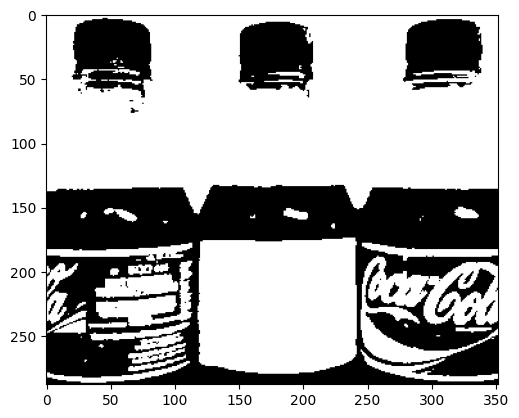

Mean value based on ROI:  253.53375


0

In [153]:
img = cv2.imread(f"images/{5}.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

check_label_presence(img)